In [45]:
# import modules
import pandas as pd
pd.options.display.max_colwidth=500
import tweepy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk
import typing
nltk.download('stopwords')
nltk.download('wordnet')
import re
#Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
#packages to build our knn model
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Karim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [46]:
     # Enter your own credentials obtained
        # from your developer account
        consumer_key = "AKJRvPwuZS686p1dxkTx3WDnV"
        consumer_secret = "MZ2dakCiJtGBzBkpfTVMFHIlPlwJjYV1bOZg5RN0qIRKxi8d6i"
        access_key = "1498368813867413505-CosP8pC5BUHY9W730ZbjcNhaA9Gk0m"
        access_secret = "eBAL5p7c4DYZVGsIPpRYHQObsAt1HEBsomcGYjUEAwT47"
 

In [47]:
alltweets = []
# Defining the function to get the tweets
def get_all_tweets(screen_name):
    auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    alltweets.extend(new_tweets)
    
    oldest = alltweets[-1].id - 1
    while len(new_tweets)>0:
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        #save most recent tweets
        alltweets.extend(new_tweets)
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        print ("...%s tweets downloaded so far" % (len(alltweets)))                # tweet.get('user', {}).get('location', {})
 
    totaltweets = [[tweet.created_at,tweet._json["user"]["name"],tweet.user.description,tweet.user.statuses_count,tweet.entities["hashtags"],tweet.entities["user_mentions"],tweet.favorite_count,
                  tweet.lang,tweet.user.friends_count,tweet.user.followers_count,tweet.retweet_count,tweet.retweeted,tweet.text,
                  tweet._json["user"]["location"]] for tweet in alltweets]
     
    tweets_df = pd.DataFrame(columns = ["time","name","totaltweets","description","hashtags","user_mentions","favorite_count",
                                    "lang","following","followers_count","retweet_count","retweeted",
                                    "text","location"])
    tweets_df["time"]  = pd.Series([str(i[0]) for i in totaltweets])
    tweets_df["name"] = pd.Series([str(i[1]) for i in totaltweets])
    tweets_df["description"] = pd.Series([str(i[2]) for i in totaltweets])
    tweets_df["totaltweets"] = pd.Series([str(i[3]) for i in totaltweets])            
    tweets_df["hashtags"] = pd.Series([str(i[4]) for i in totaltweets])
    tweets_df["user_mentions"] = pd.Series([str(i[5]) for i in totaltweets])
    tweets_df["favorite_count"] = pd.Series([str(i[6]) for i in totaltweets])
    tweets_df["lang"] = pd.Series([str(i[7]) for i in totaltweets])
    tweets_df["following"] = pd.Series([str(i[8]) for i in totaltweets])
    tweets_df["followers_count"] = pd.Series([str(i[9]) for i in totaltweets])
    tweets_df["retweet_count"] = pd.Series([str(i[10]) for i in totaltweets])
    tweets_df["retweeted"] = pd.Series([str(i[11]) for i in totaltweets])
    tweets_df["text"] = pd.Series([str(i[12]) for i in totaltweets])
    tweets_df["location"] = pd.Series([str(i[13]) for i in totaltweets])
    tweets_df.to_csv(screen_name+"_tweets.csv")
    return tweets_df

In [48]:
nolantweets = get_all_tweets("@nolanwpeterson")

...400 tweets downloaded so far
...599 tweets downloaded so far
...799 tweets downloaded so far
...998 tweets downloaded so far
...1198 tweets downloaded so far
...1398 tweets downloaded so far
...1598 tweets downloaded so far
...1798 tweets downloaded so far
...1998 tweets downloaded so far
...2197 tweets downloaded so far
...2396 tweets downloaded so far
...2595 tweets downloaded so far
...2792 tweets downloaded so far
...2987 tweets downloaded so far
...3187 tweets downloaded so far
...3237 tweets downloaded so far
...3237 tweets downloaded so far


In [49]:
#overview of nolan tweets
nolantweets.head()

,time,name,totaltweets,description,hashtags,user_mentions,favorite_count,lang,following,followers_count,retweet_count,retweeted,text,location
0,2022-05-01 18:36:37+00:00,Nolan Peterson,8221,"War reporter based in Ukraine since 2014. Former USAF special operations pilot, author, occasional adventurer. Senior editor for @CoffeeOrDieMag.",[],"[{'screen_name': 'maria_avdv', 'name': 'Maria Avdeeva', 'id': 1233515835634913281, 'id_str': '1233515835634913281', 'indices': [3, 14]}]",0,en,4000,544267,3781,False,RT @maria_avdv: Evacuation of civilians from Mariupol Azovstal began. A first group of 100 evacuees on the way to Zaporizhzhia. It is hard…,Ukraine
1,2022-05-01 15:45:26+00:00,Nolan Peterson,8221,"War reporter based in Ukraine since 2014. Former USAF special operations pilot, author, occasional adventurer. Senior editor for @CoffeeOrDieMag.",[],[],1776,en,4000,544267,131,False,Some very welcome good news. https://t.co/sNj6LBJjXw,Ukraine
2,2022-05-01 12:05:21+00:00,Nolan Peterson,8221,"War reporter based in Ukraine since 2014. Former USAF special operations pilot, author, occasional adventurer. Senior editor for @CoffeeOrDieMag.",[],[],251,en,4000,544267,40,False,"Join in tonight if you’re able. We’ll have an informed discussion, looking at the war from different perspectives. https://t.co/tpYYRjsfoW",Ukraine
3,2022-05-01 09:01:34+00:00,Nolan Peterson,8221,"War reporter based in Ukraine since 2014. Former USAF special operations pilot, author, occasional adventurer. Senior editor for @CoffeeOrDieMag.",[],[],6446,en,4000,544267,691,False,"Whether it's Ukrainian fighter pilots innovating tactics &amp; taking huge risks to stay in the fight, or Ukrainian tro… https://t.co/c7aE6i8pbN",Ukraine
4,2022-05-01 08:48:28+00:00,Nolan Peterson,8221,"War reporter based in Ukraine since 2014. Former USAF special operations pilot, author, occasional adventurer. Senior editor for @CoffeeOrDieMag.",[],[],19739,en,4000,544267,2414,False,"For 8 years, Ukraine's military has transformed, allowing front-line personnel to operate creatively &amp; as autonomou… https://t.co/ieS95Vu9Vj",Ukraine


In [50]:
nolantweets.describe(exclude='number')

,time,name,totaltweets,description,hashtags,user_mentions,favorite_count,lang,following,followers_count,retweet_count,retweeted,text,location
count,3237,3237,3237,3237,3237,3237,3237,3237,3237,3237,3237,3237,3237,3237
unique,3236,1,1,1,180,1008,636,16,2,2,702,1,3202,1
top,2021-02-11 16:32:33+00:00,Nolan Peterson,8221,"War reporter based in Ukraine since 2014. Former USAF special operations pilot, author, occasional adventurer. Senior editor for @CoffeeOrDieMag.",[],[],0,en,4000,544267,0,False,"RT @DaisyCatNine: @Nolanwpeterson takes you from combat missions in Afghanistan to the front lines against ISIS in Iraq, &amp; the trenches &amp; t…",Ukraine
freq,2,3237,3237,3237,3044,1070,1960,3180,3042,3042,178,3237,7,3237


In [51]:
nolantweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3237 entries, 0 to 3236
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   time             3237 non-null   object
 1   name             3237 non-null   object
 2   totaltweets      3237 non-null   object
 3   description      3237 non-null   object
 4   hashtags         3237 non-null   object
 5   user_mentions    3237 non-null   object
 6   favorite_count   3237 non-null   object
 7   lang             3237 non-null   object
 8   following        3237 non-null   object
 9   followers_count  3237 non-null   object
 10  retweet_count    3237 non-null   object
 11  retweeted        3237 non-null   object
 12  text             3237 non-null   object
 13  location         3237 non-null   object
dtypes: object(14)
memory usage: 354.2+ KB


In [52]:
#most hashtags used
nolantweets['hashtags'].value_counts().loc[lambda x : x>1].to_frame()

,hashtags
[],3044
"[{'text': 'BREAKING', 'indices': [18, 27]}]",3
"[{'text': 'BREAKING', 'indices': [9, 18]}]",3
"[{'text': 'SampleSunday', 'indices': [23, 36]}]",3
"[{'text': 'Ukraine', 'indices': [48, 56]}]",2
"[{'text': 'Ukraine', 'indices': [44, 52]}]",2
"[{'text': 'Donbas', 'indices': [65, 72]}]",2
"[{'text': 'Ukraine', 'indices': [26, 34]}]",2
"[{'text': 'Ukraine', 'indices': [21, 29]}]",2
"[{'text': 'Ukraine', 'indices': [20, 28]}]",2


In [53]:
#display the most user mentions
nolantweets['user_mentions'].value_counts().loc[lambda x : x>20].to_frame()

,user_mentions
[],1070
"[{'screen_name': 'nolanwpeterson', 'name': 'Nolan Peterson', 'id': 21976616, 'id_str': '21976616', 'indices': [3, 18]}]",450
"[{'screen_name': 'CoffeeOrDieMag', 'name': 'Coffee or Die Magazine', 'id': 979421077666484224, 'id_str': '979421077666484224', 'indices': [3, 18]}]",238
"[{'screen_name': 'Archer83Able', 'name': 'Status-6', 'id': 1082604507454939137, 'id_str': '1082604507454939137', 'indices': [3, 16]}]",36
"[{'screen_name': 'KofmanMichael', 'name': 'Michael Kofman', 'id': 1262845575147458560, 'id_str': '1262845575147458560', 'indices': [3, 17]}]",25
"[{'screen_name': 'The_Lookout_N', 'name': 'The Lookout', 'id': 1380168103846367234, 'id_str': '1380168103846367234', 'indices': [3, 17]}]",23
"[{'screen_name': 'RALee85', 'name': 'Rob Lee', 'id': 4107939250, 'id_str': '4107939250', 'indices': [3, 11]}]",21


In [81]:
#which tweet got the most like
print(nolantweets['favorite_count'].max())
nolantweets.loc[nolantweets['favorite_count'] == nolantweets['favorite_count'].max()]['text']

602325


424    In the bomb shelter with my cat. She’s been very brave. https://t.co/tk7nuj87zQ
Name: text, dtype: object

In [82]:
#which tweet got the most retweet
print(nolantweets['retweet_count'].max())
nolantweets.loc[nolantweets['retweet_count'] == nolantweets['retweet_count'].max()]['text']

566472


2201    RT @JoeBiden: America, I’m honored that you have chosen me to lead our great country.\n\nThe work ahead of us will be hard, but I promise you…
Name: text, dtype: object

In [56]:
sid_analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text:str, analyser,desired_type:str='pos'):
    # Get sentiment from text
    sentiment_score = analyser.polarity_scores(text)
    return sentiment_score[desired_type]

# Get Sentiment scores
def get_sentiment_scores(df,data_column):
    df[f'{data_column} Positive Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'pos'))
    df[f'{data_column} Negative Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'neg'))
    return df
#find all top scoring tweets
def print_top_n_tweets(df,data_column,number_of_rows):
    for index,row in df.nlargest(number_of_rows,data_column).iterrows():
        print(f"Score: {row[data_column]}, Tweet: {row[0]}")

In [57]:
nolantweets = get_sentiment_scores(nolantweets,'text')
tweet_sentiment = nolantweets[['text','text Positive Sentiment Score','text Negative Sentiment Score']]

In [58]:
tweet_sentiment.head()

,text,text Positive Sentiment Score,text Negative Sentiment Score
0,RT @maria_avdv: Evacuation of civilians from Mariupol Azovstal began. A first group of 100 evacuees on the way to Zaporizhzhia. It is hard…,0.000,0.000
1,Some very welcome good news. https://t.co/sNj6LBJjXw,0.618,0.000
2,"Join in tonight if you’re able. We’ll have an informed discussion, looking at the war from different perspectives. https://t.co/tpYYRjsfoW",0.095,0.169
3,"Whether it's Ukrainian fighter pilots innovating tactics &amp; taking huge risks to stay in the fight, or Ukrainian tro… https://t.co/c7aE6i8pbN",0.159,0.191
4,"For 8 years, Ukraine's military has transformed, allowing front-line personnel to operate creatively &amp; as autonomou… https://t.co/ieS95Vu9Vj",0.143,0.000


In [59]:
#Top positive tweets
print_top_n_tweets(tweet_sentiment,'text Positive Sentiment Score',10)

Score: 0.818, Tweet: Well played. https://t.co/NgpUK6Rfns
Score: 0.792, Tweet: Wow. https://t.co/UsYd5BD8Lu
Score: 0.792, Tweet: Wow. https://t.co/6VbTgTODG0
Score: 0.769, Tweet: @thegrantdoctors Awesome! Thanks for the support.
Score: 0.761, Tweet: @ResearchOdyssey Thanks!
Score: 0.761, Tweet: @LukeDCoffey Thanks!
Score: 0.761, Tweet: @LukeDCoffey thanks!
Score: 0.744, Tweet: Good. https://t.co/KdDASDY4qq
Score: 0.741, Tweet: @PaulNiland @cnni Thanks! I appreciate the support.
Score: 0.737, Tweet: @IAPonomarenko Nice.


In [60]:
#Top negative tweets
print_top_n_tweets(tweet_sentiment,'text Negative Sentiment Score',10)

Score: 0.762, Tweet: Heartbreaking, infuriating news. https://t.co/Qupm0OyvV3
Score: 0.756, Tweet: Terrible. https://t.co/PeJKjrCbrp
Score: 0.737, Tweet: Ugh. https://t.co/h94viY8nmL
Score: 0.63, Tweet: @jb__tweets Seriously
Score: 0.63, Tweet: Seriously. https://t.co/ro60uAw18l
Score: 0.615, Tweet: RT @ScottPCullinane: Scary:
Score: 0.583, Tweet: @Chaznolan @CNN ugh
Score: 0.568, Tweet: RT @RyanMOsburn: @nolanwpeterson @usairforce Terrible tragedy. Aviation mishaps are always heartbreaking.
Score: 0.551, Tweet: My latest from Ukraine

“If this offensive happens, it’s going to be a very bloody &amp; brutal war, and I no doubt bel… https://t.co/gSHnMITdNZ
Score: 0.55, Tweet: RT @KJKnodell: Once again, war doesn’t stop


In [61]:
nolantweets['retweet_count']= nolantweets['retweet_count'].astype('int64')
nolantweets['favorite_count']= nolantweets['favorite_count'].astype('int64')

In [62]:
features= nolantweets[['retweet_count','favorite_count','text Positive Sentiment Score','text Negative Sentiment Score']]
features.corr()

,retweet_count,favorite_count,text Positive Sentiment Score,text Negative Sentiment Score
retweet_count,1.000000,0.086252,0.011023,-0.002579
favorite_count,0.086252,1.000000,0.001722,0.021757
text Positive Sentiment Score,0.011023,0.001722,1.000000,-0.220452
text Negative Sentiment Score,-0.002579,0.021757,-0.220452,1.000000


<AxesSubplot:>

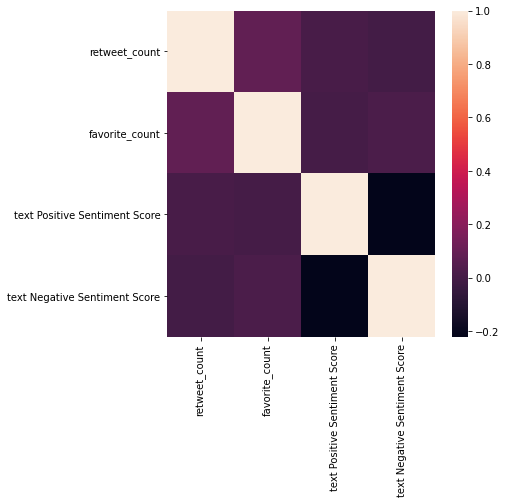

In [63]:
#correlation map
plt.figure(figsize= (6, 6))
sns.heatmap(features.corr())

In [64]:
 #Import english stop words

stopcorpus: typing.List = stopwords.words('english')

In [65]:
# Convert to lowercase, and remove stop words

def remove_links(text):
    # Remove any hyperlinks that may be in the text starting with http
    return re.sub(r"http\S+", "", text)

def style_text(text:str):
    # Convert to lowercase
    return text.lower()

def remove_words(text_data:str,list_of_words_to_remove: typing.List):
    # Remove all words as specified in a custom list of words
    return [item for item in text_data if item not in list_of_words_to_remove]

def collapse_list_to_string(string_list):
    # This is to join back together the text data into a single string
    return ' '.join(string_list)

def remove_apostrophes(text):
    # Remove any apostrophes as these are irrelavent in our word cloud
    text = text.replace("'", "")
    text = text.replace('"', "")
    text = text.replace('`', "")
    return text

def remove_others(text):
    
    text = re.sub(r'@[A-Za-z0-9]+','',text) # Remove @mentions
    text = re.sub(r'#','',text) # Remove hashtag symbols
    text = re.sub(r'RT[\s]+','',text) # Remove retweets
    text = re.sub(r'Ukraine','',text) 
    text = re.sub(r'ukraine','',text) 
    text = re.sub(r'ukrainian','',text)
    text = re.sub(r'amp','',text)
    text = re.sub(r'rt','',text)
    text = re.sub(r'Russia','',text) 
    text = re.sub(r'russia','',text) 
    return text

In [66]:
tweet_sentiment['cleaned_text'] = tweet_sentiment.loc[:,'text'].astype(str).apply(remove_links)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].astype(str).apply(style_text)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].astype(str).apply(lambda x: remove_words(x.split(),stopcorpus))

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].apply(collapse_list_to_string)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].apply(remove_apostrophes)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].apply(remove_others)

<ipython-input-66-2ade89cc017e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-66-2ade89cc017e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-66-2ade89cc017e>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-66-2ade89c

In [67]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]


tweet_sentiment['clean_lemmatized'] = tweet_sentiment['cleaned_text'].astype(str).apply(lemmatize_text)

tweet_sentiment['clean_lemmatized'] = tweet_sentiment['clean_lemmatized'].apply(collapse_list_to_string)

display(tweet_sentiment['clean_lemmatized'].head(5))

<ipython-input-67-3e2f8e3d0251>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-3e2f8e3d0251>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0    _avdv: evacuation civilian mariupol azovstal began. first group 100 evacuee way zaporizhzhia. hard…
1                                                                                     welcome good news.
2               join tonight you’re able. we’ll informed discussion, looking war different perspectives.
3                           whether fighter pilot innovating tactic &; taking huge risk stay fight, tro…
4        8 years, s military transformed, allowing front-line personnel operate creatively &; autonomou…
Name: clean_lemmatized, dtype: object

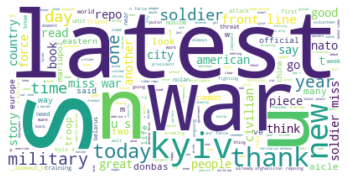

In [68]:
def plot_wordcloud(series,output_filename='wordcloud'):

    wordcloud = WordCloud(max_font_size=150, max_words=500, background_color="white").generate(' '.join(series.astype(str)))

    wordcloud.to_file(output_filename + '.png')

    plt.imshow(wordcloud, interpolation='bilinear')

    plt.axis("off")

plot_wordcloud(tweet_sentiment['clean_lemmatized'],'overall-wordcloud')

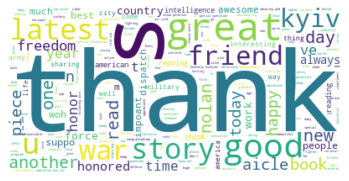

In [69]:
def plot_wordcloud_top_n(df,number_of_tweets,score_column,data_column,output_filename):
    sliced_df = df.nlargest(number_of_tweets,score_column)

    plot_wordcloud(sliced_df[data_column],output_filename)


plot_wordcloud_top_n(tweet_sentiment,500,'text Positive Sentiment Score','clean_lemmatized','positive-wordcloud')

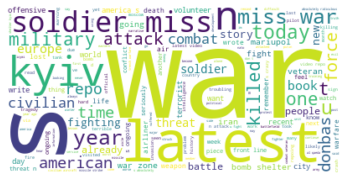

In [83]:
plot_wordcloud_top_n(tweet_sentiment,500,'text Negative Sentiment Score','clean_lemmatized','negative-wordcloud')

In [84]:
#retweets distribution over time
fig = px.line(nolantweets, x="time", y= nolantweets['retweet_count'])
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y",
    ticklabelmode="period")
fig.show()

In [85]:
df=nolantweets[['time', 'retweet_count','text Positive Sentiment Score','text Negative Sentiment Score']]
pos=nolantweets[['time', 'retweet_count','text Positive Sentiment Score']]
neg =nolantweets[['time', 'retweet_count','text Negative Sentiment Score']]
df[(df['time']>='2022-03-01') & (df['time']<='2022-04-01')]

,time,retweet_count,text Positive Sentiment Score,text Negative Sentiment Score
103,2022-03-31 20:12:13+00:00,1605,0.000,0.000
104,2022-03-31 11:00:31+00:00,334,0.000,0.145
105,2022-03-31 10:57:19+00:00,608,0.000,0.000
106,2022-03-30 16:55:16+00:00,0,0.000,0.000
107,2022-03-30 16:32:17+00:00,329,0.143,0.000
...,...,...,...,...
367,2022-03-01 06:53:39+00:00,6845,0.190,0.000
368,2022-03-01 06:47:53+00:00,3573,0.000,0.177
369,2022-03-01 06:12:14+00:00,435,0.000,0.000
370,2022-03-01 06:01:03+00:00,1002,0.000,0.000


In [86]:
#how retweets via sentiments are having an evolution over time
fig = go.Figure()
for col in pos.columns:
    fig.add_trace(go.Scatter(x=pos['time'], y=pos['text Positive Sentiment Score'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )
for col in neg.columns:
    fig.add_trace(go.Scatter(x=neg['time'], y=neg['text Negative Sentiment Score'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )
fig.show()

In [87]:

nolantweets ["is_viral"] = nolantweets .retweet_count.apply(
    lambda row: 1 if row >= nolantweets .retweet_count.mean()  else 0)

print(nolantweets .is_viral.value_counts())


0    2915
1     322
Name: is_viral, dtype: int64


In [88]:
nolantweets ['tweet_length'] = nolantweets .apply(lambda tweet: len(tweet['text']), axis=1)
nolantweets ["followers_count"] = nolantweets .apply(lambda tweet: tweet["followers_count"], axis=1)
nolantweets ["friends_count"] = nolantweets .apply(lambda tweet: tweet["following"], axis=1)

nolantweets ["hashtag_count"] = nolantweets .apply(lambda tweet: tweet.text.count("#"), axis=1)
nolantweets ["link_count"] = nolantweets .apply(lambda tweet: tweet.text.count("http"), axis=1)
nolantweets ["word_count"] = nolantweets .apply(lambda tweet: len(tweet.text.split()), axis=1)

def find_avg_word_length(str):
    #function to find average word length of a string
    sum = 0
    for i in range(0, len(str.split())):
        sum = sum + len(str.split()[i])
    avg = sum/len(str.split())
    return avg

nolantweets ["avg_length_of_words"] = nolantweets .text.apply(find_avg_word_length)

In [89]:


labels = nolantweets [["is_viral"]]
features = nolantweets [["tweet_length", "followers_count", "friends_count",'text Positive Sentiment Score','text Negative Sentiment Score']]
scaled_features = scale(features, axis=0)

features2 = nolantweets [["tweet_length", "followers_count", "friends_count", "hashtag_count", "link_count", "word_count", "favorite_count"]]
scaled_features2 = scale(features2, axis=0)

features3 = nolantweets [["tweet_length", "followers_count", "friends_count", "hashtag_count", "link_count", "word_count", "favorite_count",'text Positive Sentiment Score','text Negative Sentiment Score']]
scaled_features3 = scale(features3, axis=0)

print(features.loc[0])
print(scaled_features[0])

tweet_length                        139
followers_count                  544267
friends_count                      4000
text Positive Sentiment Score       0.0
text Negative Sentiment Score       0.0
Name: 0, dtype: object
[ 0.5473609   0.25318484  0.25318484 -0.66113892 -0.71855568]


In [90]:


train_data, test_data, train_labels, test_labels = train_test_split(scaled_features3, labels, 
                                                                    test_size = 0.2,
                                                                    random_state=1)

In [91]:


classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(train_data, train_labels)
classifier.score(test_data, test_labels)

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.9243827160493827

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\sit

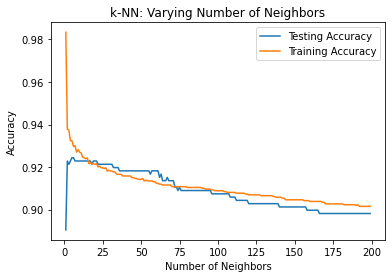

In [79]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 200)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
 # Setup a k-NN Classifier with k neighbors: knn
 knn = KNeighborsClassifier(n_neighbors=k)
 # Fit the classifier to the training data
 knn.fit(train_data, train_labels)
 
 #Compute accuracy on the training set
 train_accuracy[i] = knn.score(train_data, train_labels)
 #Compute accuracy on the testing set
 test_accuracy[i] = knn.score(test_data, test_labels)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [80]:
best_score = 0
best_k = 0

for k in range(1, 200):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    if classifier.score(test_data, test_labels) > best_score:
        best_score = classifier.score(test_data, test_labels)
        best_k = k

print(best_k)
print(best_score)

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\sit

5
0.9243827160493827


In [92]:
nolantweets.to_csv('nolantweets')